In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999



In [4]:
life_transform = pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions", life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [5]:
life_transform.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [6]:
# lifeEx = lifeEx.drop(['Unnamed: 0'],axis=1)
# lifeEx = lifeEx.drop(['COUNTRY'],axis=1)
# lifeEx = lifeEx.drop(['STATUS'],axis=1)

life_transform.describe()


,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2938.000000
mean,0.825732,2007.518720,0.501309,0.497070,0.498657,-1.876572e-16,-7.742842e-17,0.506461,0.431738,38.790629,0.484631,0.509762,4.402348e-17,0.505652,0.308969,-4.586755e-16,1.053540e-16,-2.648966e-16,0.498775,12.340658
std,0.379405,4.613841,0.278344,0.280640,0.272273,1.000170e+00,1.000170e+00,0.295571,0.340305,20.485912,0.295749,0.302967,1.000170e+00,0.298637,0.389081,1.000170e+00,1.000170e+00,1.000170e+00,0.284977,3.649192
min,0.000000,2000.000000,0.000000,0.000000,0.000000,-1.540089e+00,-2.312958e+00,0.000000,0.000000,1.000000,0.000000,0.000000,-3.762931e+00,0.000000,0.000000,-3.073607e+00,-2.426608e+00,-2.172591e+00,0.000000,0.000000
25%,1.000000,2004.000000,0.249396,0.253333,0.244444,-8.247969e-01,-7.858454e-01,0.245138,0.000000,19.400000,0.230769,0.244444,-5.484182e-01,0.255556,0.000000,-7.687574e-01,-6.717270e-01,-7.715521e-01,0.242630,10.300000
50%,1.000000,2008.000000,0.522222,0.495726,0.489899,1.080217e-01,-6.462024e-02,0.500000,0.487179,43.900000,0.500000,0.518519,-2.295318e-03,0.518519,0.000000,-2.444449e-02,-8.349672e-02,-2.535882e-02,0.508547,12.500000
75%,1.000000,2012.000000,0.742690,0.744048,0.766700,7.882520e-01,9.911980e-01,0.777778,0.730711,56.400000,0.767688,0.777778,5.692044e-01,0.777778,0.736111,8.016743e-01,6.764212e-01,8.014589e-01,0.748889,14.600000
max,1.000000,2015.000000,1.000000,1.000000,1.000000,2.393661e+00,1.623804e+00,1.000000,1.000000,116.135422,1.000000,1.000000,2.871616e+00,1.000000,1.000000,1.746533e+00,2.210668e+00,2.500756e+00,1.000000,26.135726


# Basic correlation exploration

We start by oberserving some relationships between various features and our **response variable, `LIFE_EXPECTANCY`**. We will do so through heatmaps first.

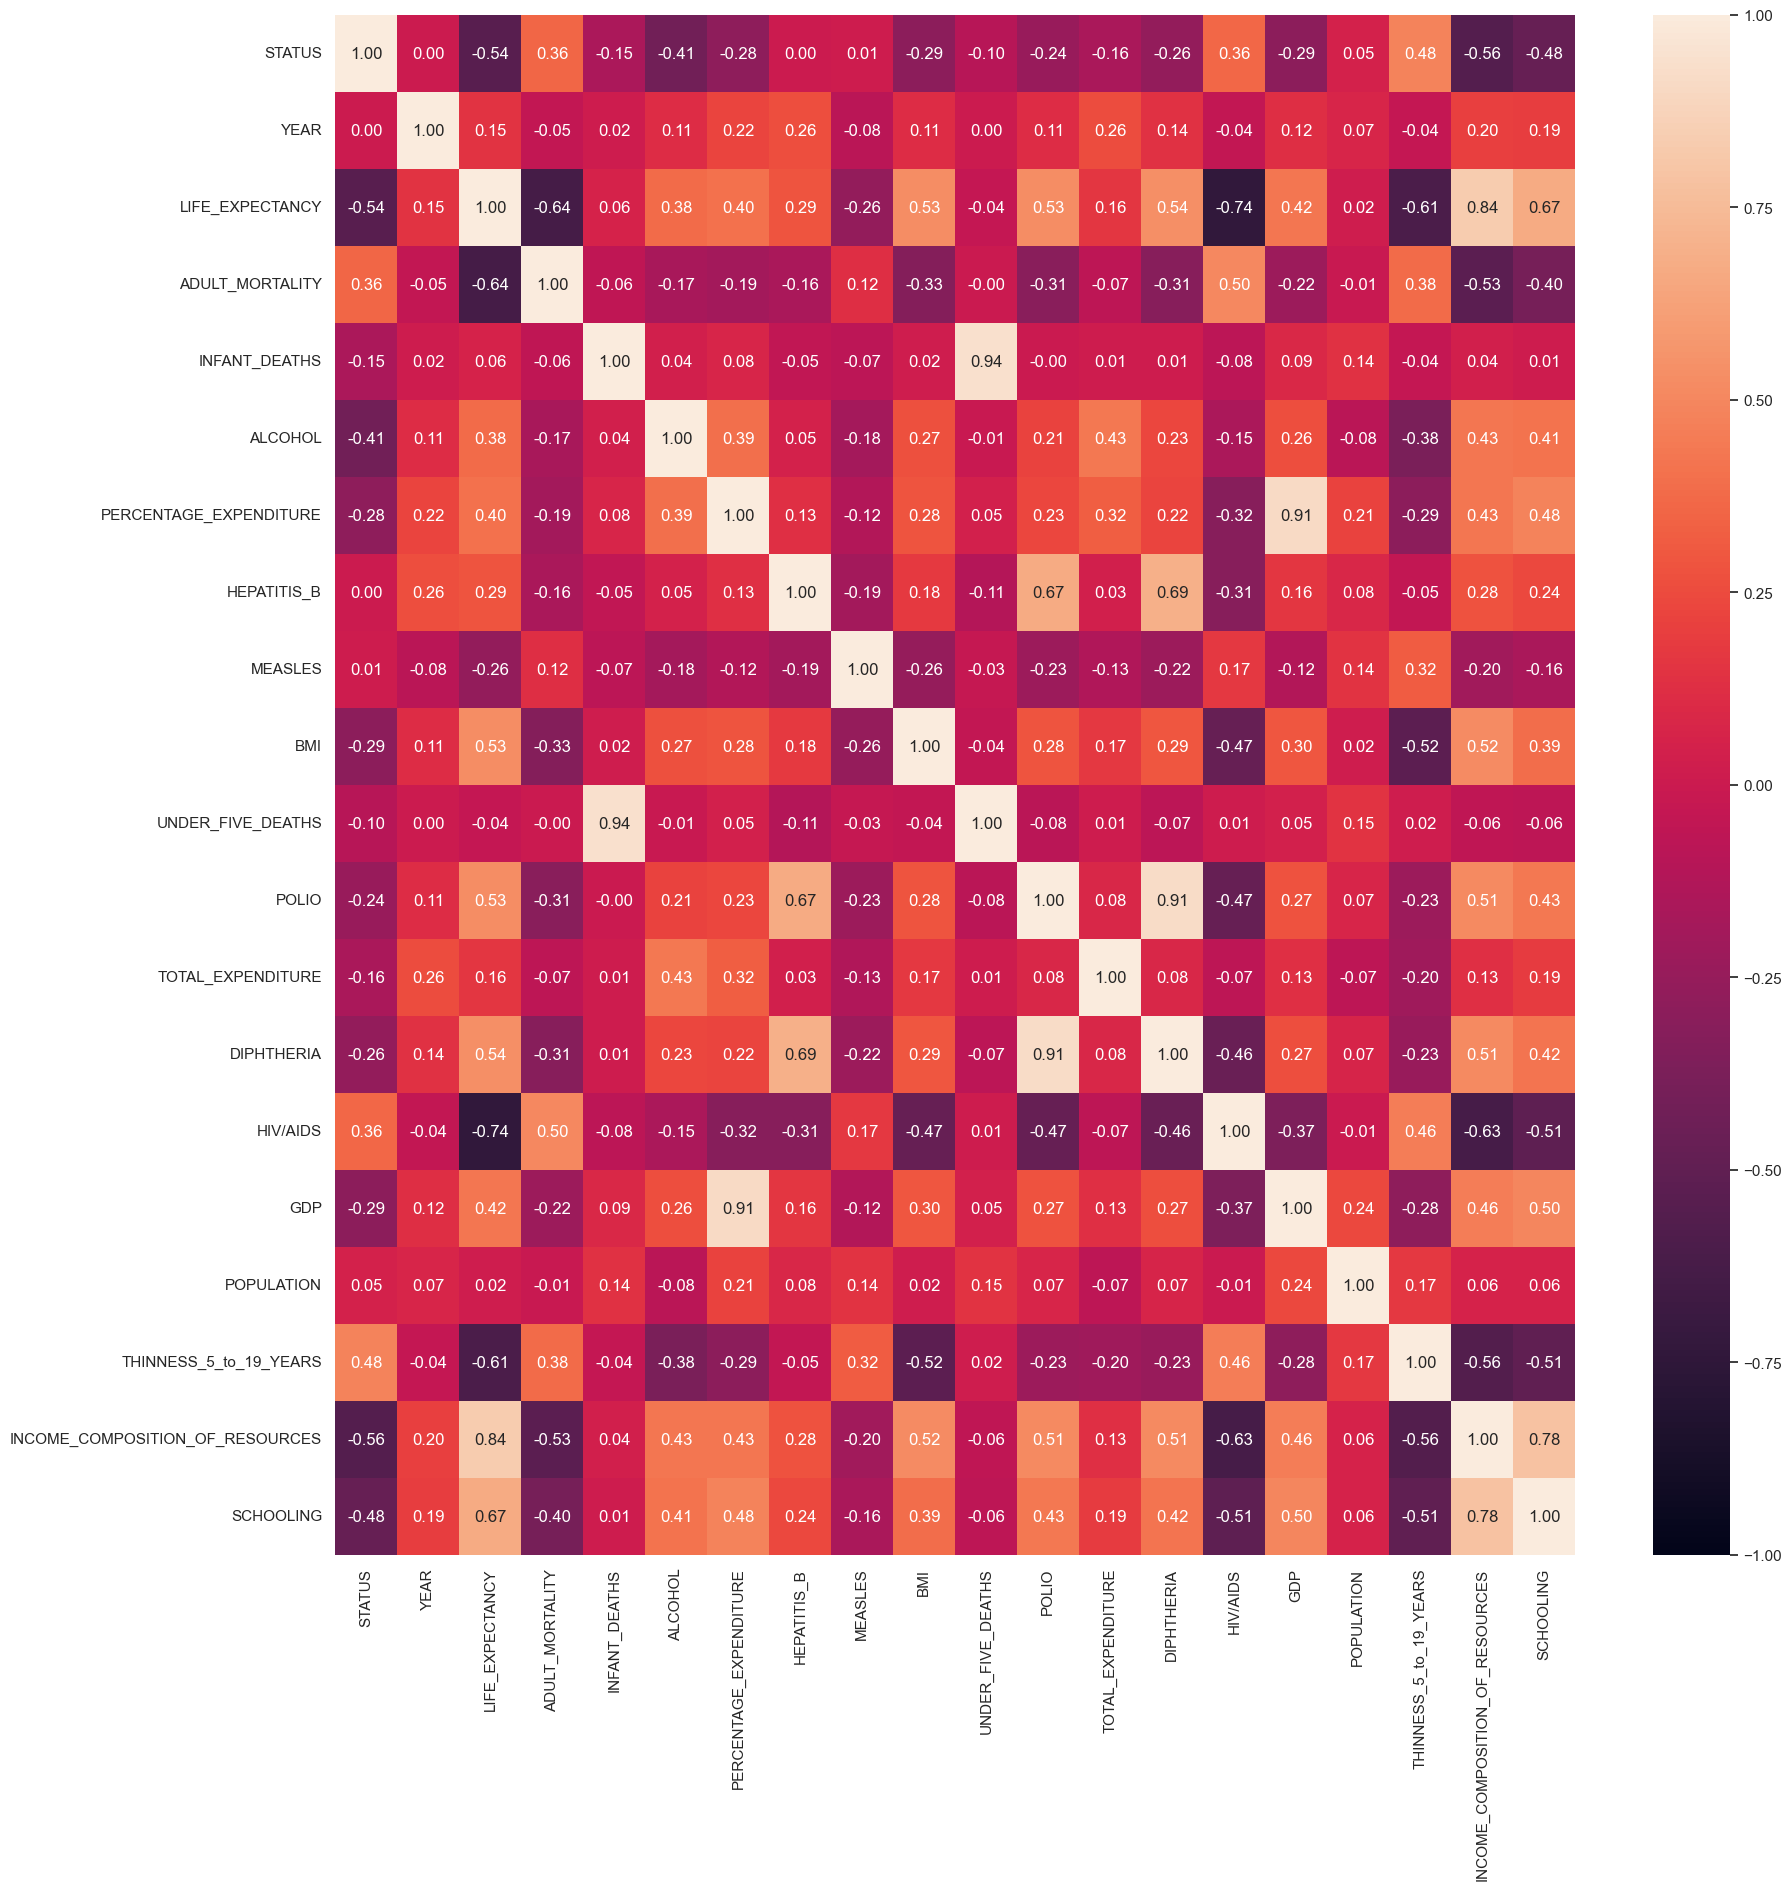

In [7]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_transform.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Features Correlating with Life Expectancy')

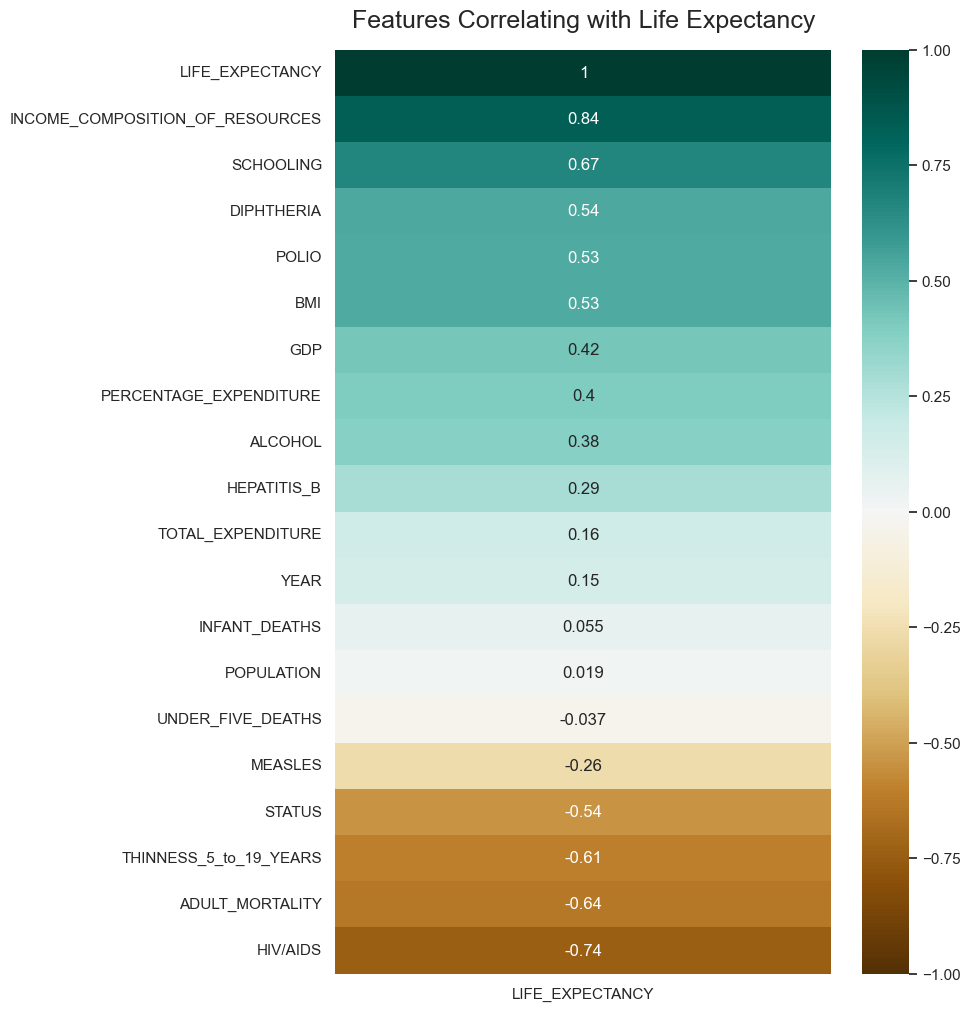

In [8]:
f=plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(life_transform.corr()[['LIFE_EXPECTANCY']].sort_values(by='LIFE_EXPECTANCY', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16)

Based on our basic observations so far, it seems like features that have a **strong positive** correlation with `LIFE_EXPECTANCY` are `SCHOOLING` and `INCOME_COMPOSITION_OF_RESOURCES` , and features that have a **strong negative** correlation with `LIFE_EXPECTANCY` are `HIV/AIDS`, `ADULT_MORTALITY` and `THINNESS_5_to_19_YEARS`, which make sense since these are often the most crippling characteristic of impoversihed nations who suffer from shorter life spans.

# Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


# Model selection

## Naive linear regression

We will first do a naive regression of using every feature to predict `LIFE_EXPECTANCY` and check how well this naive model does. We will

Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]


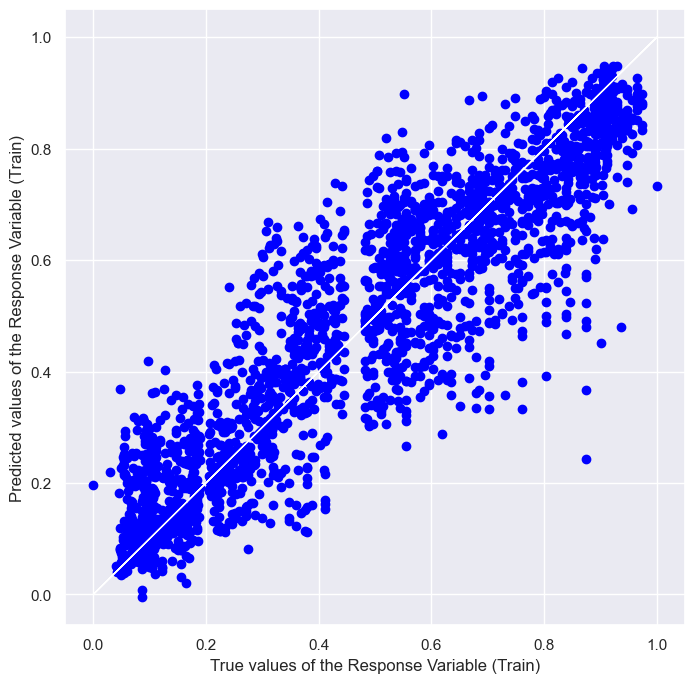

In [10]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.scatter(y_train, y_train_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")
plt.show()

In [11]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print('K-fold Cross validation score:',cross_val_score(linreg, X_train, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684102
Mean Squared Error (MSE) 	: 0.013421869731714296
K-fold Cross validation score: 0.8199291996833041



# Polynomial Regression

We will try polynomial regression with degrees from 1 to 5 and see if that better fits our data

In [12]:
from sklearn.preprocessing import PolynomialFeatures
maxscore=0
bestDegree=0

for i in range(1,5):

    poly_reg=PolynomialFeatures(degree=i)
    X_train_poly=poly_reg.fit_transform(X_train)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly,y_train)
    print("Polynomial degree is:",i)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    print()

    KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
    print('K-fold Cross validation score:',KfoldScore)
    print()
    if KfoldScore > maxscore:
        maxscore=KfoldScore
        bestDegree=i

print("The most optimum degree is",bestDegree,"with a score of",maxscore)



Polynomial degree is: 1
Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]

K-fold Cross validation score: 0.8199291996833044

Polynomial degree is: 2
Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]

K-fold Cross validation score: 0.8994357250447992

Polynomial degree is: 3
Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03

# Regression model 3

In [13]:

numplot = len(lifeEx.columns[1:])
numrows = (numplot+3)//4
f, axes = plt.subplots(nrows= numrows, ncols = 4, figsize = (16,4))
count = 0
for i, column in enumerate(lifeEx.columns[1:]):
    #plt.subplots(4, 4)
    row = i/4
    col = 1 % 4
    plt.scatter(lifeEx['LIFE_EXPECTANCY'], lifeEx[i], ax = axes[row][col] )
    plt.ylabel('Life expectancy', size = 15, ax = axes[row][col] )
    plt.xlabel(i, size = 15, ax = axes[row][col] )
    plt.show()


NameError: name 'lifeEx' is not defined

In [ ]:
plt.figure(figsize=(20,20),dpi=100)

for index, var in enumerate(lifeEx.columns[1:]):
    plt.subplot(4,5, index+1)
    plt.scatter(lifeEx[var],lifeEx['LIFE_EXPECTANCY'])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(var,size=12)

In [ ]:
predictors = pd.DataFrame(lifeEx[["SCHOOLING", "LIFE_EXPECTANCY"]])
predictors

In [ ]:
predictors.corr()

In [ ]:
schooling = pd.DataFrame(lifeEx["SCHOOLING"])
lifeExpectancy = pd.DataFrame(lifeEx["LIFE_EXPECTANCY"])

In [ ]:
2938*0.2

In [ ]:
2938-588

In [ ]:
#Train Set : 2350 samples
schoolingTrain = pd.DataFrame(schooling[-2350:])
lifeExTrain = pd.DataFrame(lifeExpectancy[-2350:])

# Test Set: 588 Samples
schoolingTest = pd.DataFrame(schooling[:588])
lifeExTest = pd.DataFrame(lifeExpectancy[:588]) 

print("Train Set :", schoolingTrain.shape, lifeExTrain.shape)
print("Test Set :", schoolingTest.shape, lifeExTest.shape)

In [ ]:
schoolingTrain.info

In [ ]:
schoolingTrain.describe()

In [149]:
lifeExTrain.describe()

,LIFE_EXPECTANCY
count,2350.000000
mean,69.439432
std,9.319304
min,36.300000
25%,63.500000
50%,72.000000
75%,75.800000
max,91.933283


<AxesSubplot:>

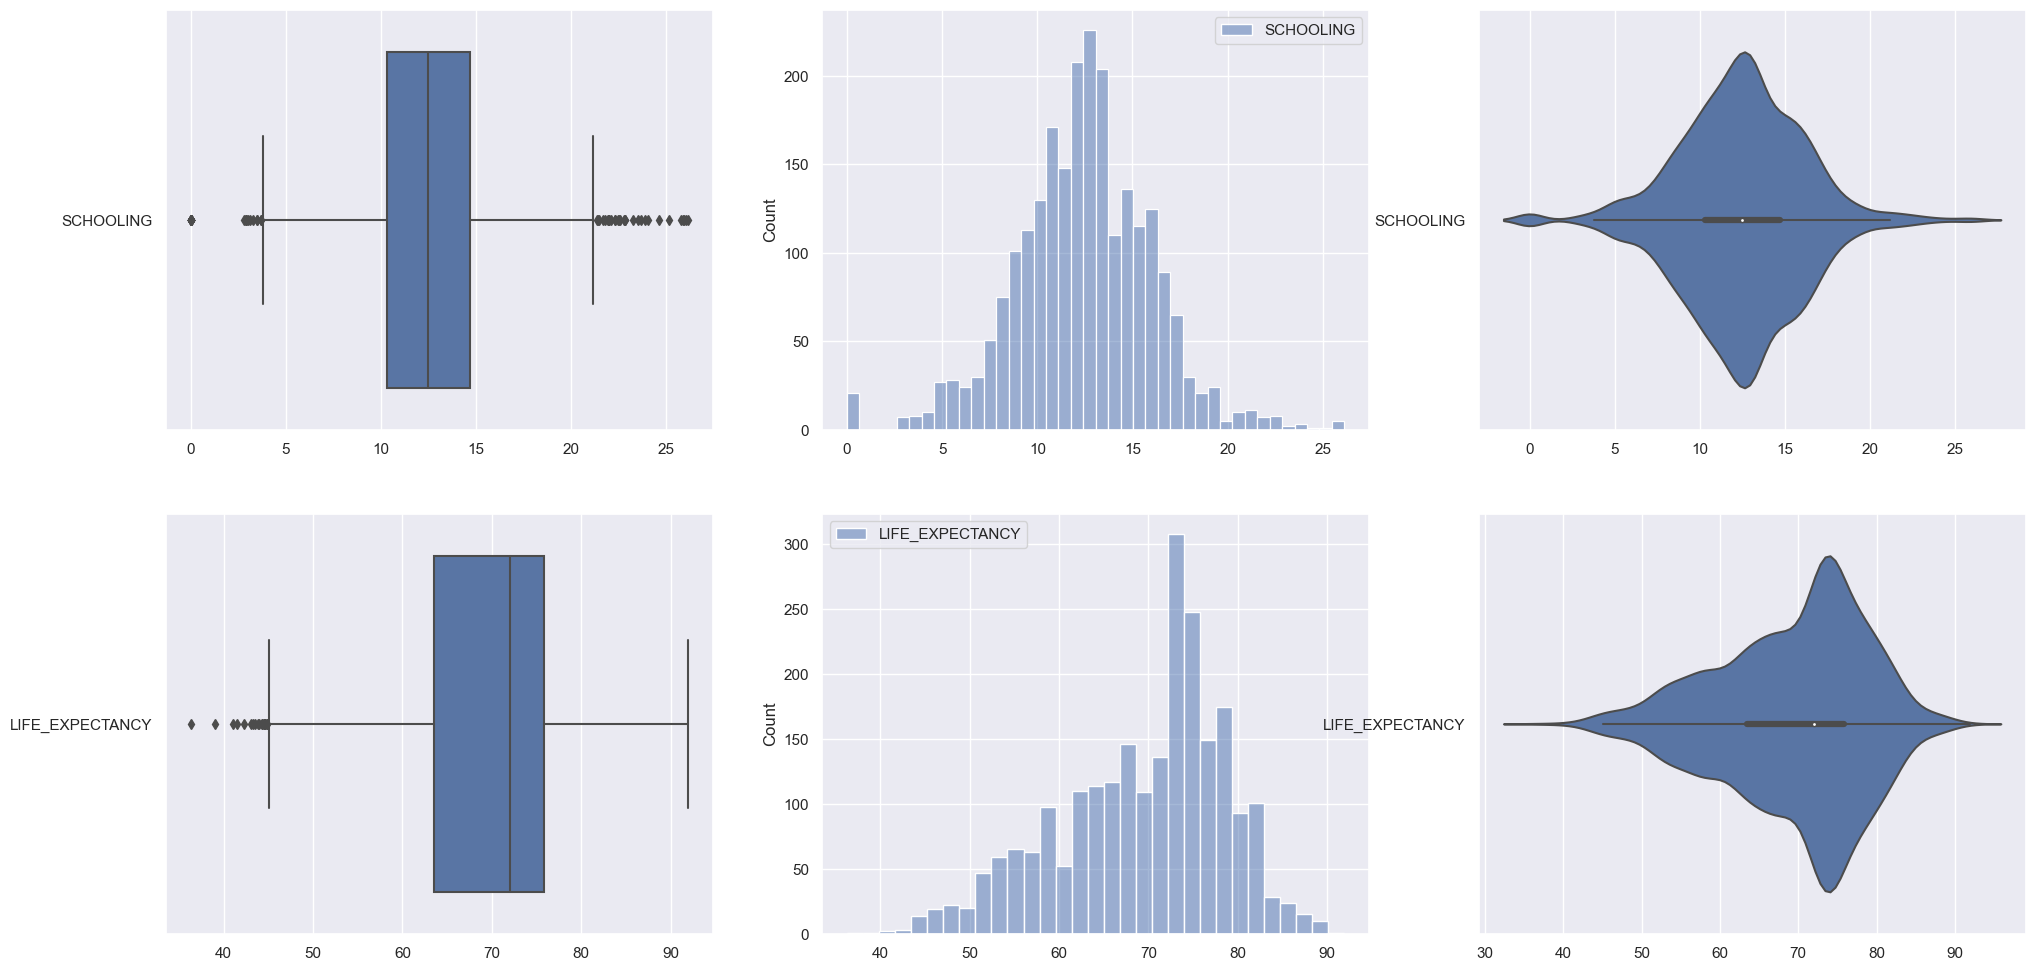

In [150]:
f,axes = plt.subplots(2, 3, figsize = (24,12))

# Plot the basic uni-varitae figures for garageArea Train data
sb.boxplot (data = schoolingTrain, orient = 'h', ax = axes[0,0])
sb.histplot (data = schoolingTrain, ax = axes [0,1])
sb.violinplot (data = schoolingTrain, orient = 'h', ax = axes [0,2])

# Plot the basic uni-variate figures for salePrice Train Data
sb.boxplot (data = lifeExTrain, orient = 'h', ax = axes[1,0])
sb.histplot (data = lifeExTrain, ax = axes[1,1])
sb.violinplot (data = lifeExTrain, orient = 'h',ax = axes[1,2])

In [151]:
trainDF = pd.concat([schoolingTrain, lifeExTrain], axis = 1)
trainDF

,SCHOOLING,LIFE_EXPECTANCY
588,11.6,72.4
589,11.5,71.8
590,11.4,71.5
591,11.3,71.4
592,11.1,63.5
...,...,...
2933,9.2,44.3
2934,9.5,44.5
2935,10.0,44.8
2936,9.8,45.3


In [152]:
trainDF.corr()

,SCHOOLING,LIFE_EXPECTANCY
SCHOOLING,1.000000,0.638801
LIFE_EXPECTANCY,0.638801,1.000000


<AxesSubplot:>

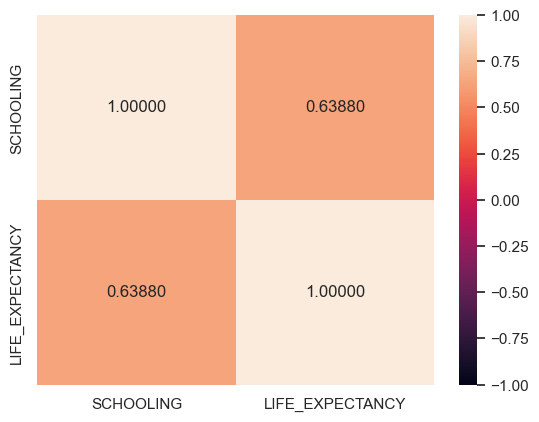

In [153]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, robust = True, annot = True, fmt = ".5f", square = False)
#sb.heatmap(trainDF.corr(), annot = True, fmt = ".5f", linecolor = 'red')

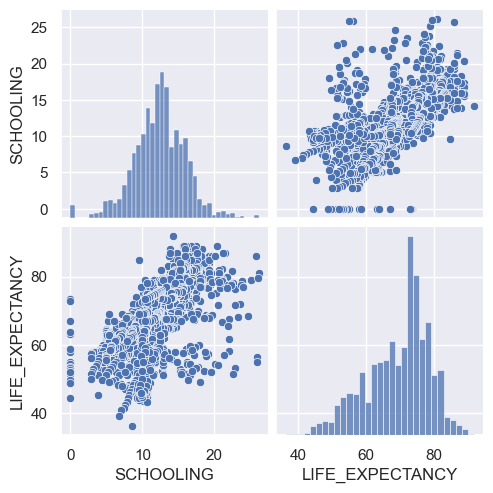

In [154]:
sb.pairplot(data = trainDF)

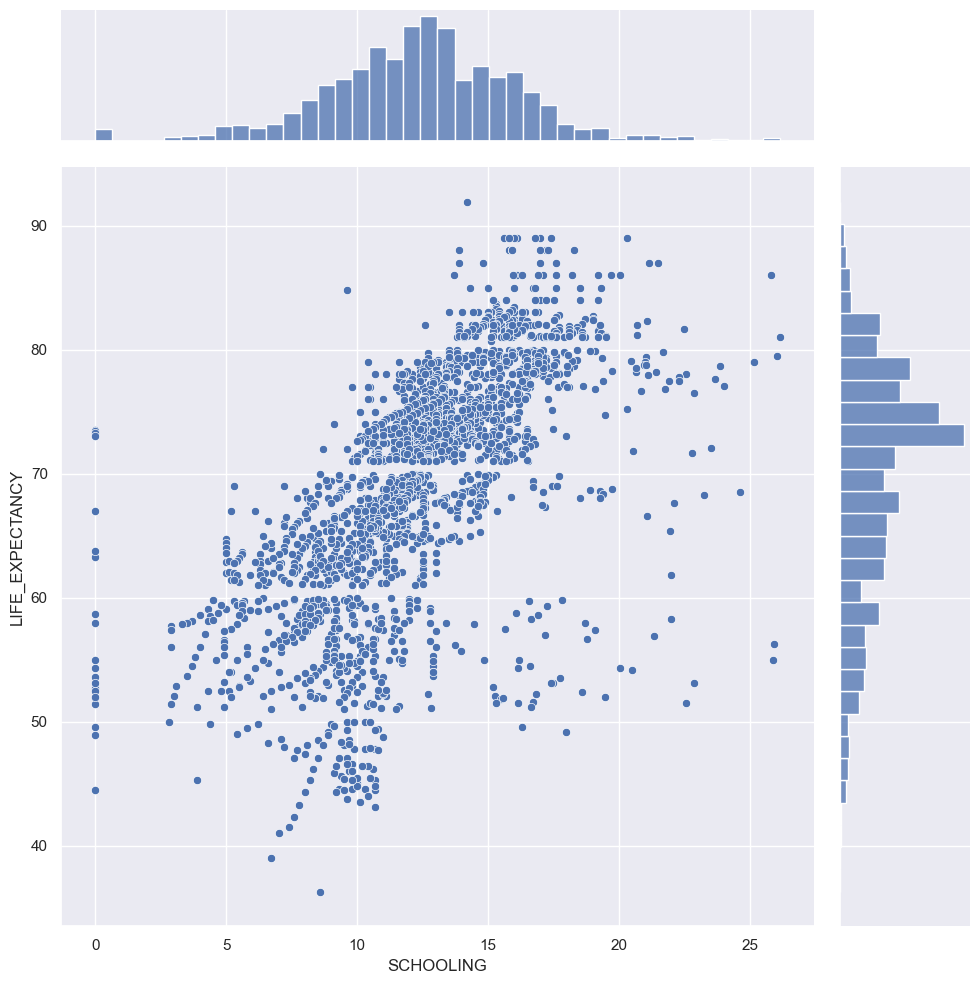

In [155]:
sb.jointplot(data=trainDF, x = 'SCHOOLING', y = 'LIFE_EXPECTANCY', height=10)

In [156]:
##Linear Regression

In [2]:
linreg=LinearRegression()
linreg.fit(schoolingTrain, lifeExTrain)

NameError: name 'LinearRegression' is not defined

In [158]:
SOMETHING

NameError: name 'SOMETHING' is not defined

In [1]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficiencts \t: a=', linreg.coef_)


NameError: name 'linreg' is not defined

In [ ]:
#Drawing the linear model line
lifeExTrainPred = linreg.predict(schoolingTrain)

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(schoolingTrain, lifeExTrain)
plt.scatter(schoolingTrain, lifeExTrainPred, color = "g")
plt.show()

## CHECKING GOODNESS OF FIT OF THE MODEL
# Metrics : Explained Variance and Mean Squared Error

In [ ]:
print("Explained Variance (R^2) \t:", linreg.score(schoolingTrain, lifeExTrain))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(schoolingTrain, lifeExTrainPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



In [ ]:
lifeExTestPred = linreg.predict(schoolingTest)

# Plot the Predictions
f = plt.figure(figsize=(16, 16))
plt.scatter(schoolingTest, lifeExTest, color = "green")
plt.scatter(schoolingTest, lifeExTestPred, color = "white")
plt.show()

In [159]:
print("Explained Variance (R^2) \t:",linreg.score(schoolingTest, lifeExTest))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(schoolingTest, lifeExTestPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4221627445056725
Mean Squared Error (MSE) 	: 3230.550902525629
Root Mean Squared Error (RMSE) 	: 56.837935417515205


#For now the r^2 aint looking good but I guess can use this to say looking at one variable is not enough to tell the whole picture?


#Doing some logistic regression to see the relation of a developing country and their .. 
# maybe I also do the multi output regression haha idk which param yet but we'll see



#Logistics Regression


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [172]:
LogsRegDF = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", LogsRegDF.shape)
LogsRegDF.head()

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [173]:
# dont think its necessary but maybe put the violin histo and boxplot

In [174]:
logsRegPred = pd.DataFrame(LogsRegDF[["SCHOOLING", "STATUS"]])
logsRegPred.head(n = 1000)

,SCHOOLING,STATUS
0,10.1,1
1,10.0,1
2,9.9,1
3,9.8,1
4,9.5,1
...,...,...
995,17.0,0
996,16.9,0
997,16.9,0
998,16.8,0


In [175]:
logsRegPred.shape


(2938, 2)

In [176]:
Schooling = pd.DataFrame(LogsRegDF["SCHOOLING"])
CountryStatus = pd.DataFrame(LogsRegDF["STATUS"])


In [190]:
CountryStatus = pd.get_dummies(CountryStatus, drop_first = True)
#CountryStatus['STATUS'] = 1 - CountryStatus['STATUS']
CountryStatus.sample(10)
#df_dummies['A_1'] = 1 - df_dummies['A_1']

,STATUS
2134,0
712,1
2831,1
2225,1
2868,1
483,1
1837,0
698,0
2053,0
1130,1


# 1 Means Country is Considered As Developed
# 2 Means Country is Considered As Developing

In [180]:
CountryStatus.dtypes

STATUS    int64
dtype: object

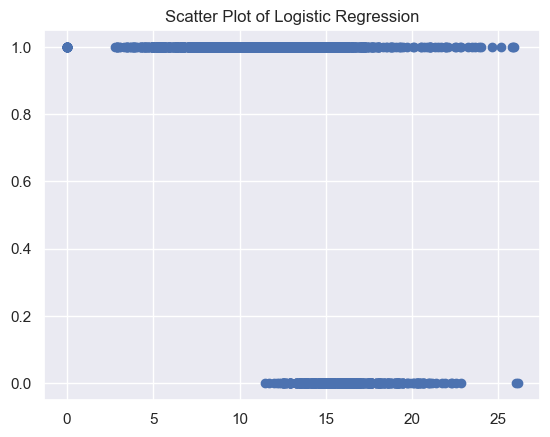

In [192]:
#colors = ['red' if CountryStatus == 1 else 'yellow']
plt.scatter(Schooling, CountryStatus,  cmap='Rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [193]:
SchoolingTrain, SchoolingTest, CountryStatusTrain, CountryStatusTest = train_test_split(Schooling, CountryStatus, test_size = 0.25)

In [194]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(SchoolingTrain, CountryStatusTrain)

## Random Forest Regression

In [39]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
life_transform.head()

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [41]:
life_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [42]:
life_transform_num=life_transform.drop(['COUNTRY','STATUS','YEAR'],axis=1)
xVar=life_transform_num.drop('LIFE_EXPECTANCY',axis=1)
yVar=life_transform_num[['LIFE_EXPECTANCY']]
xTrain,xValid,yTrain,yValid=train_test_split(xVar,yVar,test_size=0.3,random_state=42)

### Model Random Forest Regression

In [43]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)


In [44]:
regressor.fit(xTrain,yTrain)

C:\Users\USER\AppData\Local\Temp\ipykernel_8952\2668531102.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xTrain,yTrain)


RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [45]:
y_pred=regressor.predict(xValid)

In [46]:
y_pred

array([0.56856188, 0.76865043, 0.69690829, 0.73374678, 0.10438169,
       0.09684601, 0.34968995, 0.64367961, 0.78293884, 0.12324466,
       0.10041393, 0.14722173, 0.13319749, 0.55382404, 0.42180927,
       0.2366324 , 0.16567051, 0.88532722, 0.51049096, 0.87614669,
       0.90415129, 0.93640167, 0.56977074, 0.42650085, 0.55025346,
       0.38218426, 0.15077126, 0.28247436, 0.91758622, 0.63651028,
       0.35763636, 0.65205038, 0.59373728, 0.49909857, 0.8656241 ,
       0.07425209, 0.20653939, 0.57963241, 0.26673573, 0.64286776,
       0.11526351, 0.19007009, 0.71563719, 0.90942952, 0.77472163,
       0.07740965, 0.90096744, 0.5823351 , 0.2526751 , 0.55643352,
       0.10477994, 0.49427518, 0.91487101, 0.8478136 , 0.67097392,
       0.15475959, 0.59102518, 0.58262001, 0.27906333, 0.47328328,
       0.76262553, 0.111278  , 0.67663342, 0.5071342 , 0.09886826,
       0.10554309, 0.09887745, 0.79584719, 0.16484989, 0.52558231,
       0.90969856, 0.81670371, 0.61241347, 0.10166202, 0.11056

In [47]:
y_pred=pd.DataFrame(y_pred,columns=['yPredict'])

In [48]:
y_pred

,yPredict
0,0.568562
1,0.768650
2,0.696908
3,0.733747
4,0.104382
5,0.096846
6,0.349690
7,0.643680
8,0.782939
9,0.123245


In [49]:
yValid

,LIFE_EXPECTANCY
2546,0.611111
650,0.754386
1740,0.650794
177,0.795699
1377,0.091228
535,0.077778
2371,0.359477
2014,0.626984
321,0.810036
2493,0.109357


### Scatter Plot

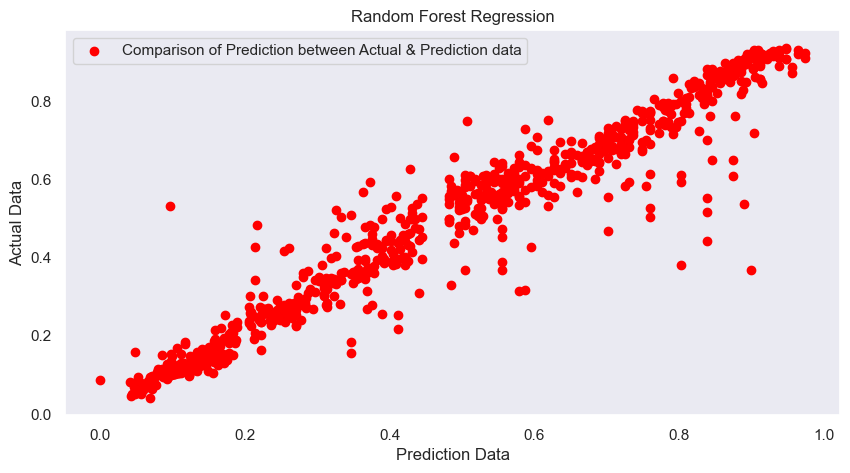

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(yValid,y_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

### R-Square value

In [51]:
metrics.r2_score(yValid,y_pred)

0.9447585454228777

In [52]:
print("Explained Variance (R^2) \t:",metrics.r2_score(yValid,y_pred)

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(yValid, y_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

SyntaxError: invalid syntax (693353057.py, line 4)